In [1]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
dinfo = pd.read_csv("data/info.csv")
dinfo.head(10)

,class id,filepaths,labels,data set
0,0,train/ADONIS/001.jpg,ADONIS,train
1,0,train/ADONIS/002.jpg,ADONIS,train
2,0,train/ADONIS/003.jpg,ADONIS,train
3,0,train/ADONIS/004.jpg,ADONIS,train
4,0,train/ADONIS/005.jpg,ADONIS,train
5,0,train/ADONIS/006.jpg,ADONIS,train
6,0,train/ADONIS/007.jpg,ADONIS,train
7,0,train/ADONIS/008.jpg,ADONIS,train
8,0,train/ADONIS/009.jpg,ADONIS,train
9,0,train/ADONIS/010.jpg,ADONIS,train


In [3]:
dinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13594 entries, 0 to 13593
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class id   13594 non-null  int64 
 1   filepaths  13594 non-null  object
 2   labels     13594 non-null  object
 3   data set   13594 non-null  object
dtypes: int64(1), object(3)
memory usage: 424.9+ KB


<Axes: xlabel='labels'>

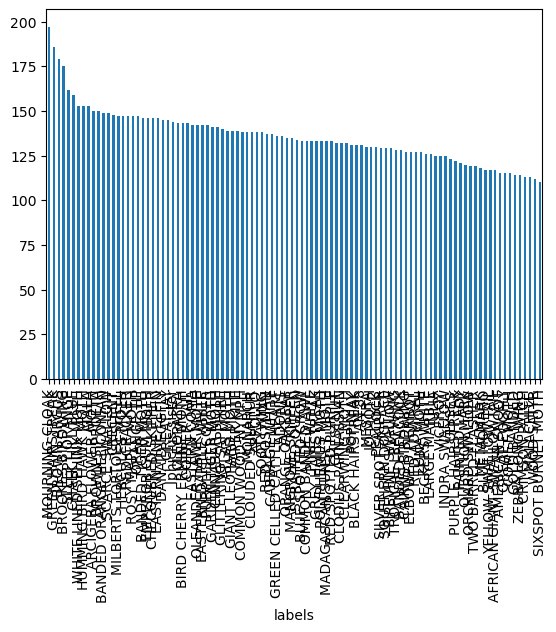

In [4]:
dinfo.labels.value_counts().plot.bar()

In [4]:
df = dinfo[dinfo["data set"] == "train"]


In [12]:
%%time
class DataSet:

    def __init__(self, path="data", stat="train"):
        self.path = path
        dinfo = pd.read_csv(f"{path}/info.csv")
        self.dinfo = dinfo[dinfo["data set"] == stat]

    def get_data(self):
        size = len(self.dinfo.filepaths)
        x_data = np.zeros((size, 224, 224, 3), dtype=np.uint8)
        y_data = np.zeros((size,), dtype=np.uint8)
        n = 0
        for id_cl, fl, *_ in self.dinfo.values:
            x_data[n] = np.array(Image.open(f"{self.path}/{fl}"), dtype=np.uint8)
            y_data[n] = id_cl

            n += 1

        return x_data, y_data


x_train, y_train = DataSet().get_data()
x_test, y_test = DataSet(stat="test").get_data()
x_val, y_val = DataSet(stat="valid").get_data()

CPU times: user 4.76 s, sys: 919 ms, total: 5.68 s
Wall time: 6.86 s


(12594, 224, 224, 3) (12594,)


(<matplotlib.image.AxesImage at 0x16a7613f0>, 8)

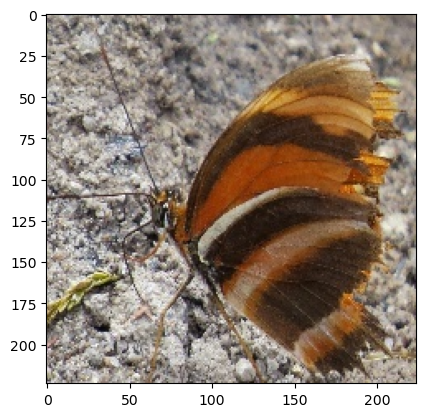

In [14]:
print(x_train.shape,y_train.shape)
plt.imshow(x_train[1001]),y_train[1001]

In [15]:
def conver_good_size(img):
    if type(img) != Image:
        img = Image.fromarray(np.squeeze(img))

    img = img.resize((224, 224))
    image = np.array(img, dtype=float)
    return image
def processed_image(img):
    image = conver_good_size(img)
    size = image.shape
    lab = rgb2lab(1.0 / 255 * image)
    X, ab = lab[:, :, 0], lab[:, :, 1:]

    ab /= 128
    X = X.reshape(1, size[0], size[1], 1)
    ab = ab.reshape(1, size[0], size[1], 2)
    return X, ab, np.array(image, dtype=int)

array([[[  0,   7,   1],
        [  0,  14,   1],
        [  6,  24,   0],
        ...,
        [  0,   4,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       [[  0,   9,   1],
        [  3,  17,   4],
        [ 10,  28,   2],
        ...,
        [  0,   3,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       [[  0,  12,   2],
        [  5,  22,   4],
        [ 13,  33,   5],
        ...,
        [  0,   3,   0],
        [  0,   4,   0],
        [  0,   5,   1]],

       ...,

       [[ 86, 112,  65],
        [ 83, 109,  64],
        [ 67,  92,  53],
        ...,
        [  0,   5,   0],
        [  2,   7,   1],
        [  3,   8,   2]],

       [[ 88, 111,  65],
        [ 81, 104,  60],
        [ 67,  89,  51],
        ...,
        [  0,   5,   1],
        [  0,   6,   2],
        [  1,   7,   3]],

       [[ 87, 110,  64],
        [ 78, 101,  57],
        [ 66,  86,  49],
        ...,
        [  1,   5,   4],
        [  0,   6,   2],
        [  0,   6,   2]]